This notebook uses the LineDetection class to retrieve the coordinates of streaks in images. The purpose of this notebook is to provide an experimentation space to use that class structure and apply it on various images. 

You must have the line_detection.py file in the same folder as this notebook. Additionally, you should have a "Data" folder containing the images that you want to analyze. So far, this code has been tested on 8 images obtained from the following source:

https://epyc.astro.washington.edu/~dinob/dssg/



In [1]:
#Import the module and other libraries
import line_detection
import image_rotation
from pixelplot import pixelplot
from astropy.io import fits
import astropy.visualization as aviz
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import gaussian
%matplotlib inline


In [2]:
#Import your data
'''
I am pasting 8 images that I worked with to write this code. 
But you can use this format to import any image you want
'''

img1 = fits.open('/home/localdir/satmetrics/Data/calexp-0941420_07.fits', cache = True)
img2 = fits.open('/home/localdir/satmetrics/Data/calexp-0941422_33.fits', cache = True)
img3 = fits.open('/home/localdir/satmetrics/Data/calexp-0941424_34.fits', cache = True)
img4 = fits.open('/home/localdir/satmetrics/Data/calexp-0941426_16.fits', cache = True)
img5 = fits.open('/home/localdir/satmetrics/Data/calexp-0941424_37.fits', cache = True)
# img6 = fits.open('Data/STARLINK-1892-20220305200929.fits',cache = True)
# img7 = fits.open('Data/STARLINK-1892-N-20220305200959.fits',cache = True)
# img8 = fits.open('Data/STARLINK-1905-20220305191929.fits',cache = True)



In [3]:
#Set up your image data
'''
Note:
Please check where the data actually lies in the fits file. You can do that my typing img1.info()
Usually, the image is in the first element i.e. img1[0], but in many cases it can be in the 
2nd element i.e. img1[1]. So before applying the line detection class, make sure your img_data
actually has data

These 2 lines are the code you should change when you want to work with a different image.
'''

img_data = img2[1].data
img_data_copy = img_data.copy()



In [4]:
#Importing the class
detector = line_detection.LineDetection()


#Assigning initial parameters

The class needs certain parameters. You can check the code for the documentation of those parameters. 
But here are those:

        image = the image you want to detect streaks in
        
        trim = Takes True/False. If you want to trim the edges of the image or not
        trim_percent = percentage of edge you want to trim
        
        nstd1_normalize = Reduce outlier pixel intensities beyond these many standard
        deviations in the first cut of processing the image
        nstd2_normalize = Same as above, but for the second cut of image processing
        
        keeppercent = Threshold the image to keep the top x percent of pixel intensity values
        
        threshold = the percentage of diagonal length you want to successfully vote 
                    a line of pixels as a straight line streak
        




Threshold: 915 pixels
Found 12 lines.
original image
<class 'numpy.ndarray'>
(4096, 2048)
edge detected image
<class 'numpy.ndarray'>
(3277, 1639)
Detected line
<class 'numpy.ndarray'>
(4096, 2048, 3)


<AxesSubplot:>

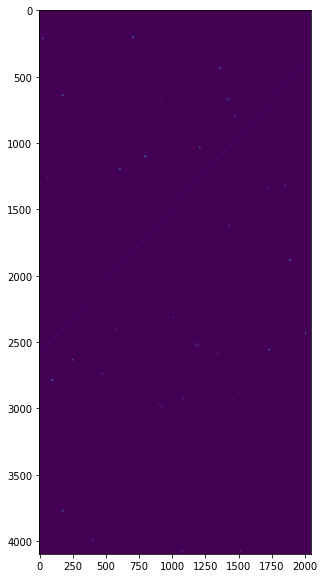

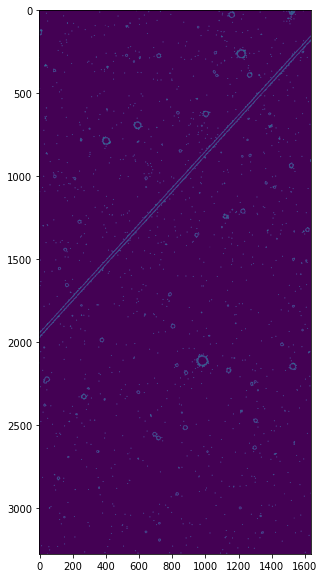

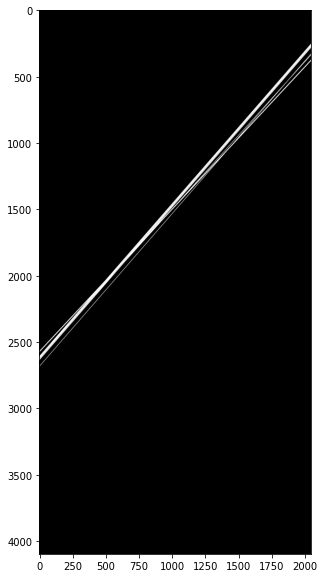

In [5]:
detector.image = img_data_copy
detector.trim = True
detector.trim_percent = 0.9
detector.nstd1_normalize = 5 #talk to abhilash on what he would recommend to have the streak appear more prominent
detector.nstd2_normalize = 3
detector.keeppercent = 0.05
detector.threshold = 0.2

#Conduct the line detection
lined_img, processed, thresholded_image, edges, lines = detector.hough_transformation()

#Visualize
print("original image")
detector.show(img_data)

print("edge detected image")
detector.show(edges)

print("Detected line")
detector.show(lined_img)



In [6]:
#List the coordinates of the lines
lines

array([[[1.7470000e+03, 7.3303831e-01]],

       [[1.7540000e+03, 7.5049156e-01]],

       [[1.7570000e+03, 7.5049156e-01]],

       [[1.7210000e+03, 7.1558499e-01]],

       [[1.7240000e+03, 7.1558499e-01]],

       [[1.7300000e+03, 7.1558499e-01]],

       [[1.7280000e+03, 7.1558499e-01]],

       [[1.7190000e+03, 7.1558499e-01]],

       [[1.7620000e+03, 7.1558499e-01]],

       [[1.7150000e+03, 7.1558499e-01]],

       [[1.7130000e+03, 7.1558499e-01]],

       [[1.7650000e+03, 7.1558499e-01]]], dtype=float32)

In [7]:
rot = image_rotation.ImageRotation()
rot.image = lined_img
rot.polar_coor = lines

In [8]:
rot.coord_all_lines(rot.polar_coor)

[([0, 2610.8506], [2048, 336.316162109375]),
 ([0, 2571.8538], [2048, 375.642578125]),
 ([0, 2576.2524], [2048, 380.041259765625]),
 ([0, 2623.2395], [2048, 267.284912109375]),
 ([0, 2627.8123], [2048, 271.857666015625]),
 ([0, 2636.9578], [2048, 281.003173828125]),
 ([0, 2633.9094], [2048, 277.954833984375]),
 ([0, 2620.1912], [2048, 264.236572265625]),
 ([0, 2685.734], [2048, 329.779296875]),
 ([0, 2614.094], [2048, 258.139404296875]),
 ([0, 2611.0457], [2048, 255.091064453125]),
 ([0, 2690.3066], [2048, 334.35205078125])]

In [9]:
rot.mean_coordinates(rot.coordinates)

([0.0, 2625.1873], [2048.0, 302.64158121744794])

In [10]:
rot.rotate_image(img_data)

None
1024.0 1463.0


In [11]:
angle = -47
rot.rotate_image(img_data, angle)

-47
1024.0 1463.0


<class 'numpy.ndarray'>
(818, 2048)


<AxesSubplot:>

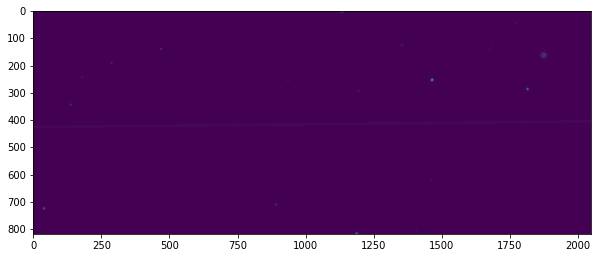

In [12]:
detector.show(rot.rotated_image)

(<Figure size 576x576 with 2 Axes>, <Axes:>, <Axes:>)

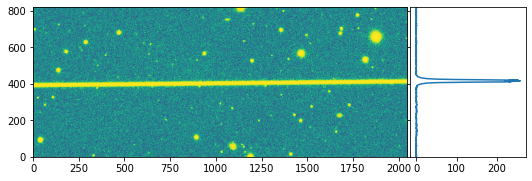

In [13]:
rotated_img = rot.rotated_image
pixelplot(rotated_img, "Calexp-0941422_33.fits")

In [14]:
ax.get_position().xmax

NameError: name 'ax' is not defined

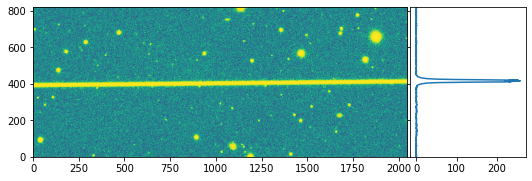

In [ ]:
left, width = 0.1, 0.65
bottom, height = 0.1, 1
spacing = 0.005

rect_scatter = [left, bottom, width, height]
#rect_histy = [left + width + spacing, bottom, 0.2, height/4]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)

stretch = aviz.HistEqStretch(rotated_img)
norm = aviz.ImageNormalize(rotated_img, stretch=stretch, clip=True)
histeq = norm(rotated_img)

ax.imshow(histeq, extent = (0, w, 0, h))

bbox = ax.get_position()
rect_histy = [bbox.xmax + spacing, bbox.ymin, 0.2, bbox.ymax - bbox.ymin]
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax_histy.tick_params(axis="y", labelleft=False)

h,w = rotated_img.shape
ax_histy.plot(np.median(rotated_img, axis= 1), np.arange(0, h))



In [ ]:
np.median(rotated_img, axis= 1).shape

(818,)

<AxesSubplot:>

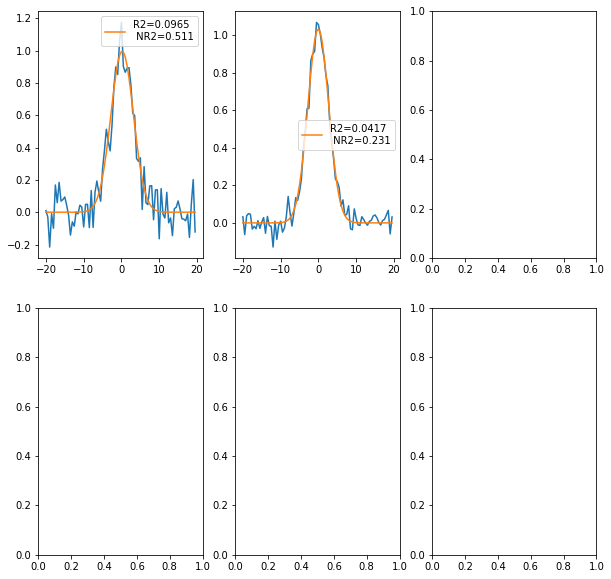

In [ ]:
x = np.arange(-20,20,0.5)
y = gaussian.generate_data(a=1, mu=0, width=2, noise_level=20, xlim=(-20,20), step=0.5)

fig, axes = plt.subplots(2, 3)
a, mu, sigma = gaussian.fit(x,y)
gaussian.plot_profile(x,y, ax=axes[0,1])

y = gaussian.generate_data(a=1, mu=0, width=2, noise_level=10, xlim=(-20,20), step=0.5)
a, mu, sigma = gaussian.fit(x,y)
gaussian.plot_profile(x,y, ax=axes[0,0])


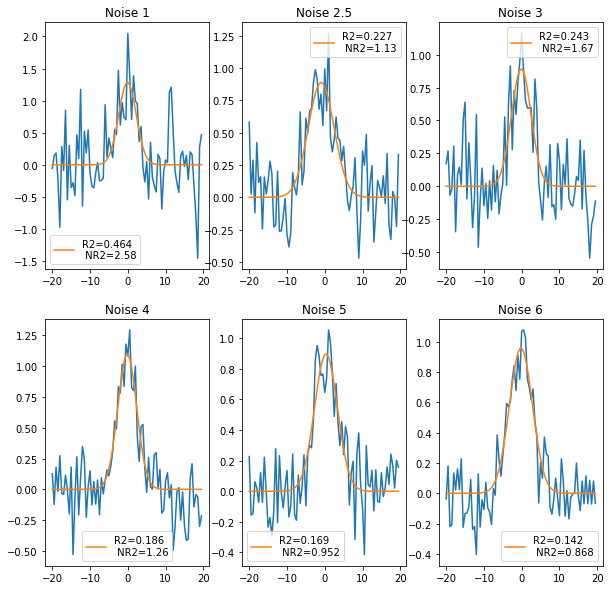

In [ ]:
x = np.arange(-20,20,0.5)

fig, axes = plt.subplots(2, 3)
axes = axes.ravel()

noise_lvl = [1,2.5,3,4,5,6]
for i, ax in zip(noise_lvl, axes):
    y = gaussian.generate_data(a=1, mu=0, width=2, noise_level=i+1, xlim=(-20,20), step=0.5)

    a, mu, sigma = gaussian.fit(x,y)
    ax =  gaussian.plot_profile(x,y, ax=ax)
    ax.set_title(f"Noise {i}")

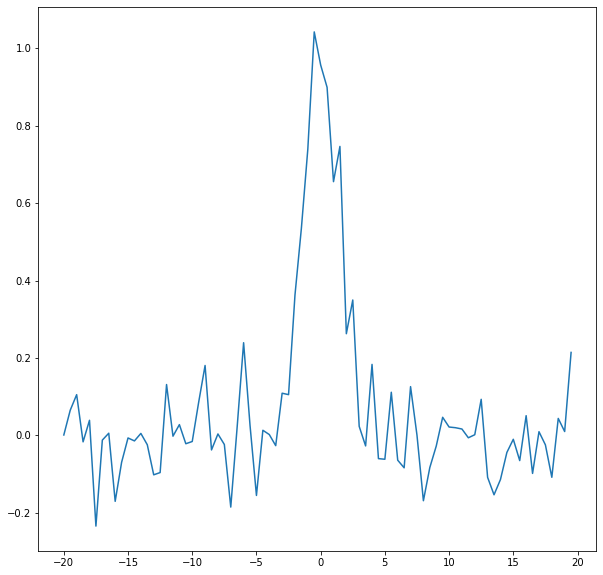

In [ ]:
xlim = (-20, 20)
step = 0.5
x = np.arange(xlim[0], xlim[1], step)
y = gaussian.generate_data(x, a=1, mu=0, width=1, noise_level=10)
plt.plot(x,y)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

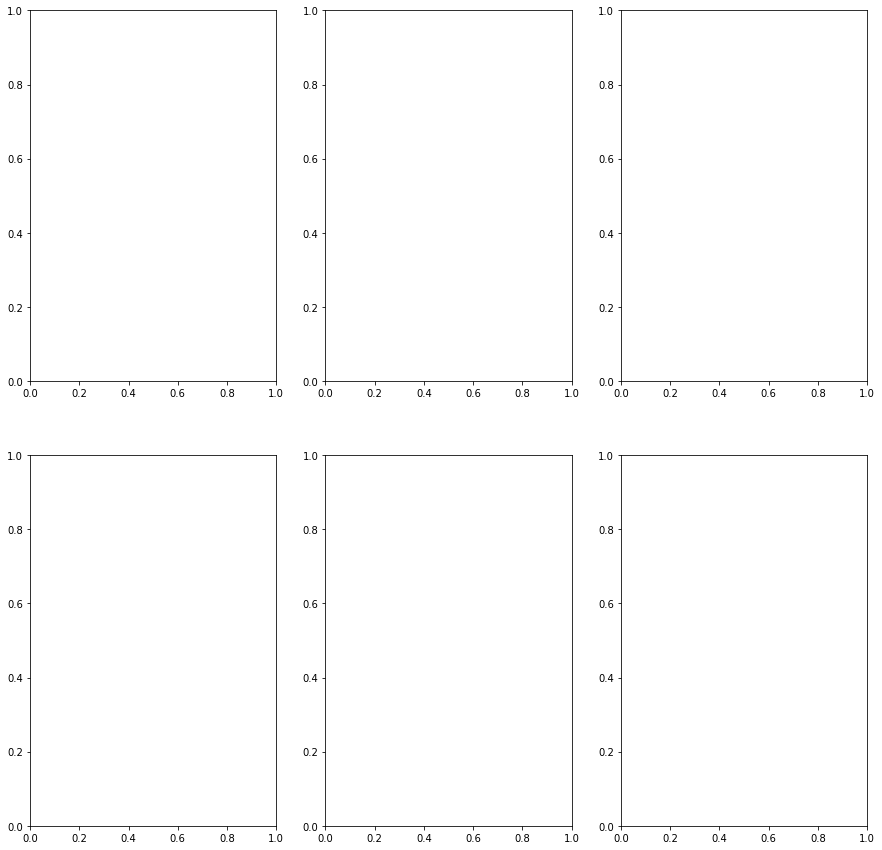

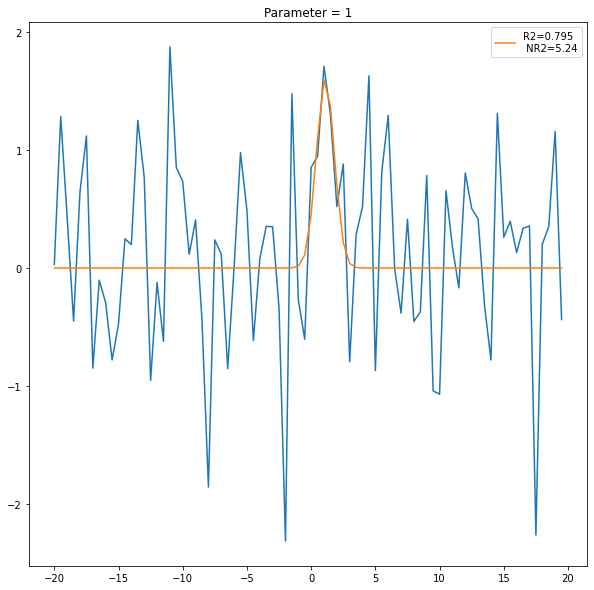

In [16]:
xlim = (-20, 20)
step = 0.5
x = np.arange(xlim[0], xlim[1], step)

fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.ravel()

noise = [1, 2, 3, 4, 5, 6]

for i, ax in zip(noise, axes):
    y = gaussian.generate_data(x, a=1, mu=0, width=1, noise_level=i)
    ax = gaussian.plot_profile(x, y)
    ax.set_title(f"Parameter = {i}")

In [ ]:
def plot(rotated_img):
    ax2 = fig.add_subplot(212)
    plt.plot(np.median(rotated_img, axis= 1))
    ax2.set_xlabel("Pixel", fontsize=16)
    ax2.set_ylabel("Counts/pixel", fontsize=18)

In [ ]:
y = list(np.median(rotated_img, axis = 1))
print(y)

[0.6902385, 0.78501153, -0.14944178, 0.55918443, -0.16093951, 0.53590906, 0.72309744, 0.8297155, 1.3310418, 0.61188185, -0.15045452, 0.73229814, -0.4299016, 0.44780797, 0.06778911, 0.0007389635, 0.09632969, 0.44529718, 0.8103359, 0.19245201, 0.3469623, 0.10103935, -0.4307821, 0.32289195, 0.7762277, -0.377169, 0.23334515, 0.15663685, 0.7162518, -0.23342168, 0.1766941, -0.027905464, -0.9727516, -0.0121643245, 0.0048041344, 0.7483448, 0.41059095, -0.81084335, 0.14697212, -0.29431736, -0.12533975, -0.20591664, -0.052889585, -0.2630621, 0.058053732, -0.37051928, -0.10845846, 0.73955095, 0.08097899, -0.43120155, -0.26308286, -0.021880329, 0.5034622, -0.15376312, -0.8949137, -0.34439406, 0.14445305, -0.14834821, -0.17821376, -0.1915021, 1.8926626, -0.31854045, -0.61943305, -0.39579844, 0.34432828, -0.067711115, -0.06436038, 0.10491067, -0.443912, 0.5422641, 0.38002697, 0.5559441, 0.85408974, -0.23441523, -0.43503335, 0.122991145, 0.2882835, -0.0018162131, -0.036216438, -0.10628915, -0.5762911

In [ ]:
x = np.arange(0, rotated_img.shape[0], 1)
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
len(x)

818

In [ ]:
len(y)

818

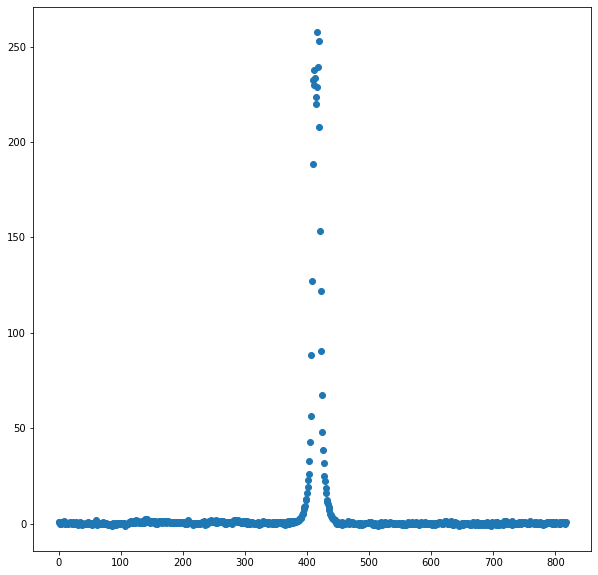

In [ ]:
plt.scatter(x,y)

In [ ]:
def gauss(x, a, mu, width):
    return a*np.exp(-1/2 * ((x-mu)**2/width**2))

In [ ]:
#(a, mu, width), unc = optim.curve_fit(gauss, x, y, p0=[200, 300, 50])
#print((a, mu, width), unc)
z = optim.curve_fit(gauss, x, y, p0=[200, 300, 50], full_output=True)
print(z)


(array([260.68289302, 414.96687339,   5.90957482]), array([[ 2.42641154e+00,  3.84892774e-08, -3.66705816e-02],
       [ 3.84892774e-08,  1.66261770e-03, -8.71758021e-10],
       [-3.66705816e-02, -8.71758021e-10,  1.66261769e-03]]), {'fvec': array([-6.90238476e-01, -7.85011530e-01,  1.49441779e-01, -5.59184432e-01,
        1.60939515e-01, -5.35909057e-01, -7.23097444e-01, -8.29715490e-01,
       -1.33104181e+00, -6.11881852e-01,  1.50454521e-01, -7.32298136e-01,
        4.29901600e-01, -4.47807968e-01, -6.77891076e-02, -7.38963485e-04,
       -9.63296890e-02, -4.45297182e-01, -8.10335875e-01, -1.92452013e-01,
       -3.46962303e-01, -1.01039350e-01,  4.30782109e-01, -3.22891951e-01,
       -7.76227713e-01,  3.77169013e-01, -2.33345151e-01, -1.56636849e-01,
       -7.16251791e-01,  2.33421683e-01, -1.76694095e-01,  2.79054642e-02,
        9.72751617e-01,  1.21643245e-02, -4.80413437e-03, -7.48344779e-01,
       -4.10590947e-01,  8.10843349e-01, -1.46972120e-01,  2.94317365e-01,
       

NameError: name 'a' is not defined

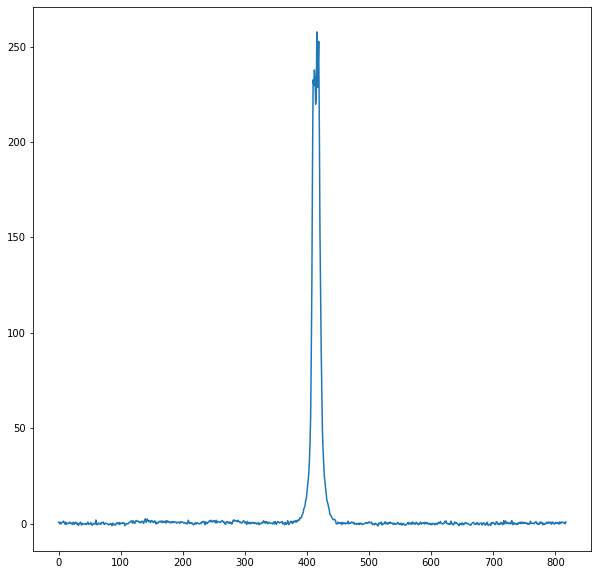

In [ ]:
plt.plot(x,y)
plt.plot(x, gauss(x, a, mu, width))

In [ ]:
#muguess = (x[-1] - x[0])/2)
#ask dino why sigma is returning -4
#a = 250-255
#dino: do you have a suggestion for how to use the uncertanities that it returned to assess if the gaussian fit is decent or not


In [ ]:
#rmse
np.sqrt(np.sum((y - gauss(x, a, mu, width))**2)/len(x))

4.108701954598105

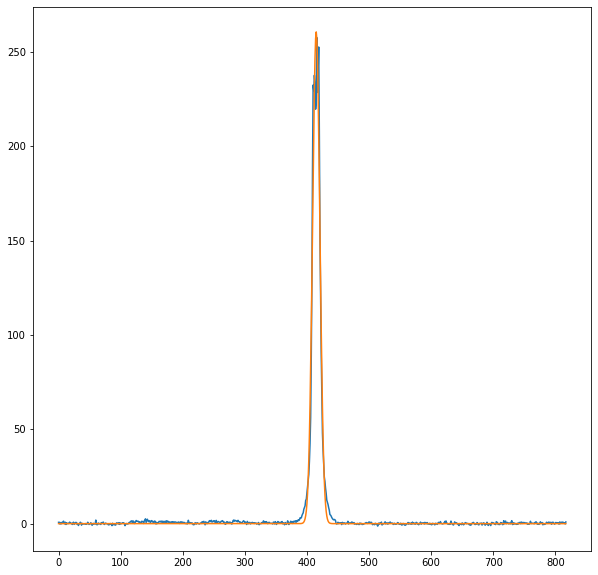

In [ ]:
fit(rotated_img)

In [ ]:
confirmstreak(a, y)

True


In [ ]:
#look at statistical meaningful test r^2/x^2